In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/kvinlazy/Dataset/refs/heads/master/drug200.csv

--2024-11-13 17:51:43--  https://raw.githubusercontent.com/kvinlazy/Dataset/refs/heads/master/drug200.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/plain]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-11-13 17:51:43 (56.5 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [3]:
drug_data = pd.read_csv("/content/drug200.csv")

In [4]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
drug_data.shape

(200, 6)

In [6]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
drug_data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [9]:
drug_data.duplicated().sum()

0

Sex
M    104
F     96
Name: count, dtype: int64


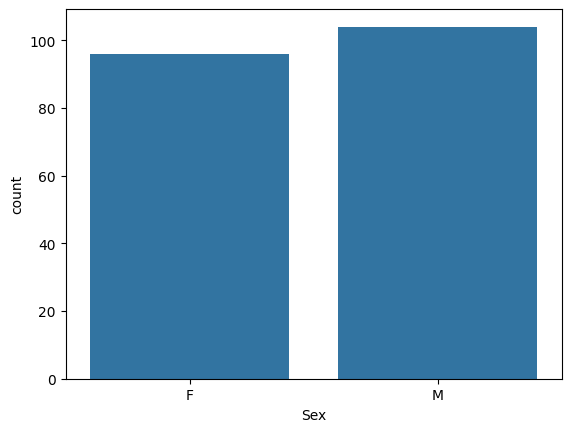

In [12]:
x = drug_data.Sex.value_counts()
print(x)
p = sns.countplot(data=drug_data, x="Sex")
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


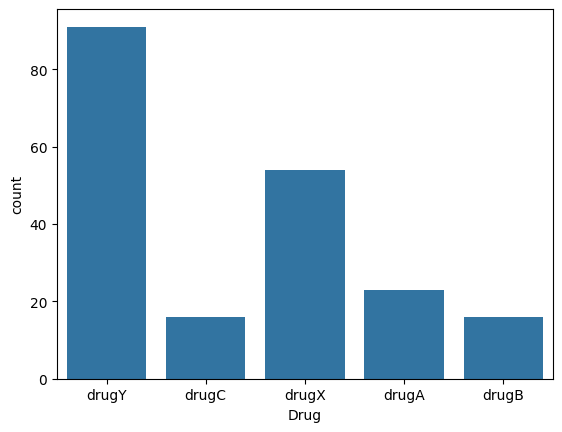

In [13]:
x= drug_data.Drug.value_counts()
print(x)
p = sns.countplot(data=drug_data, x="Drug")
plt.show()

In [14]:
drug_data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

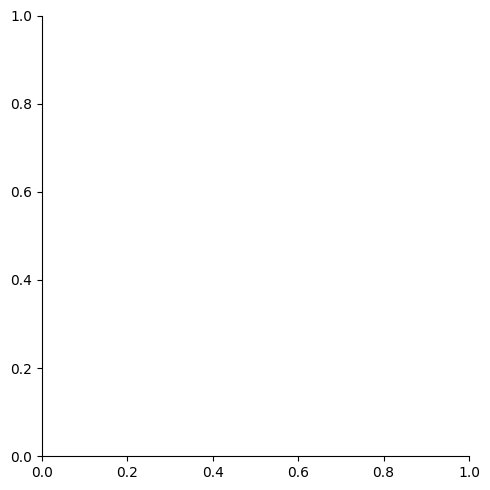

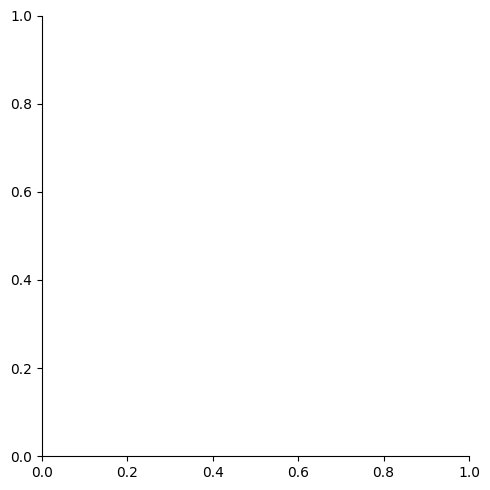

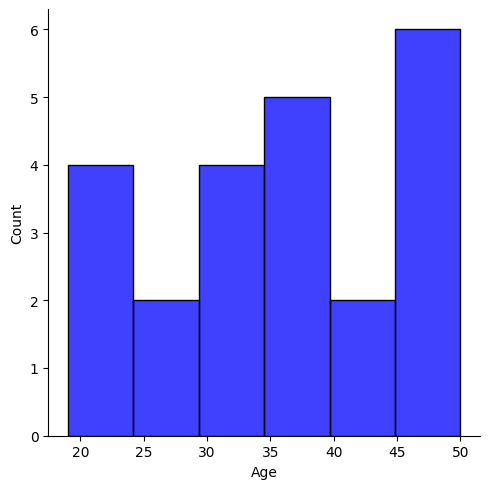

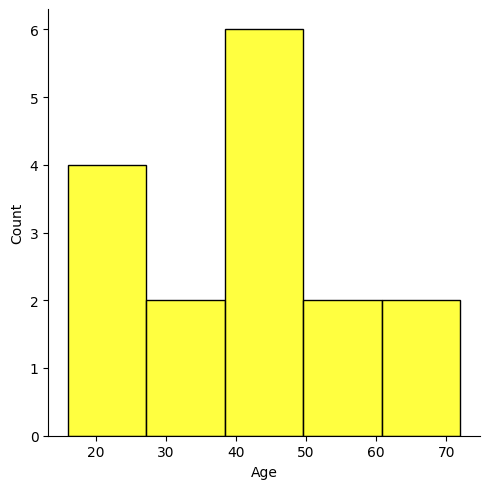

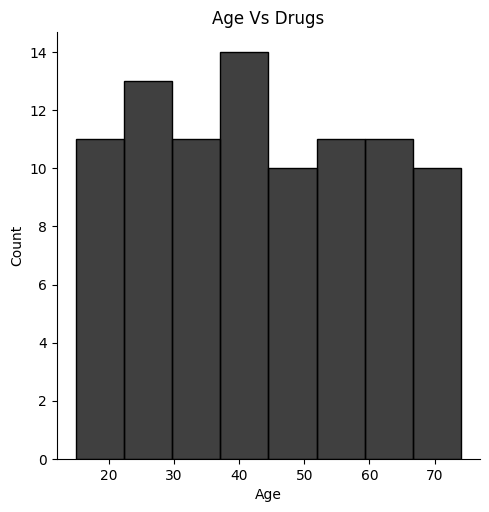

In [16]:
plt.figure(figsize=(10,10))
sns.displot(drug_data[drug_data["Drug"] == "drugy"]["Age"], color="green",)
sns.displot(drug_data[drug_data["Drug"] == "drugx"]["Age"], color="red",)
sns.displot(drug_data[drug_data["Drug"] == "drugA"]["Age"], color="blue",)
sns.displot(drug_data[drug_data["Drug"] == "drugC"]["Age"], color="yellow",)
sns.displot(drug_data[drug_data["Drug"] == "drugY"]["Age"], color="black", )
plt.title("Age Vs Drugs")
plt.show

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
drug_data["BP"] = oe.fit_transform(drug_data[["BP"]])
drug_data["Sex"] = oe.fit_transform(drug_data[["Sex"]])
drug_data["Cholesterol"] = oe.fit_transform(drug_data[["Cholesterol"]])
drug_data["Drug"] = oe.fit_transform(drug_data[["Drug"]])


In [18]:
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [19]:
x = drug_data.iloc[:, 0:-1]
y = drug_data.iloc[:, -1]

In [20]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [21]:
y

,Drug
0,4.0
1,2.0
2,2.0
3,3.0
4,4.0
...,...
195,2.0
196,2.0
197,3.0
198,3.0


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [24]:
y_train

,Drug
79,3.0
197,3.0
38,3.0
24,4.0
122,4.0
...,...
106,3.0
14,3.0
92,4.0
179,4.0


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)

In [27]:
y_pred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini, y_test))

1.0


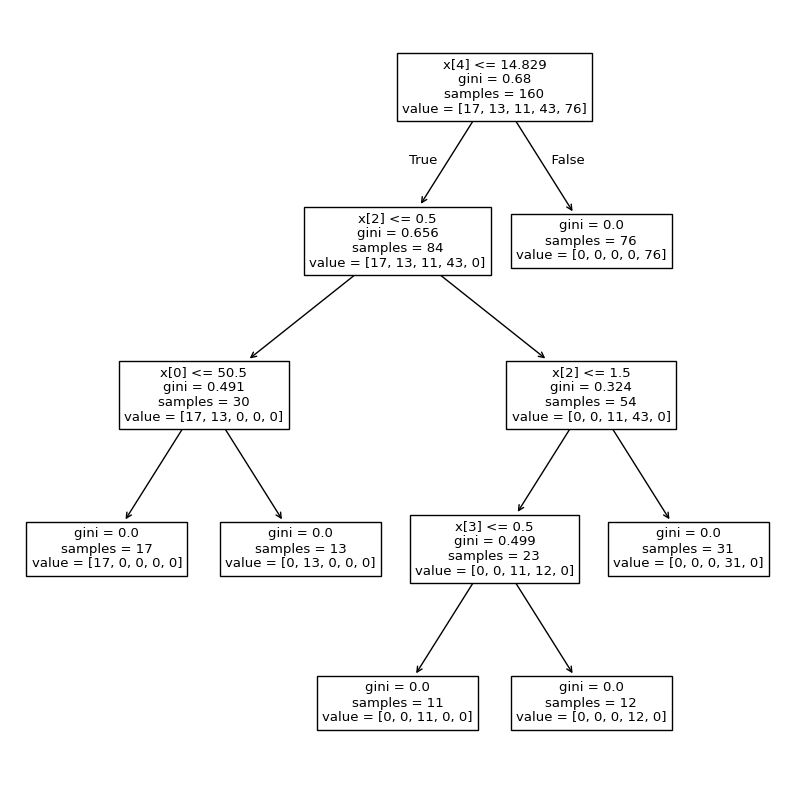

In [29]:
from sklearn import tree
plt.figure(figsize= (10,10))
tree.plot_tree(clf_gini.fit(x_train,y_train))
plt.show()

In [30]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth =3, random_state=0)
clf_entropy.fit(x_train, y_train)
y_pred_entropy = clf_entropy.predict(x_test)

0.875


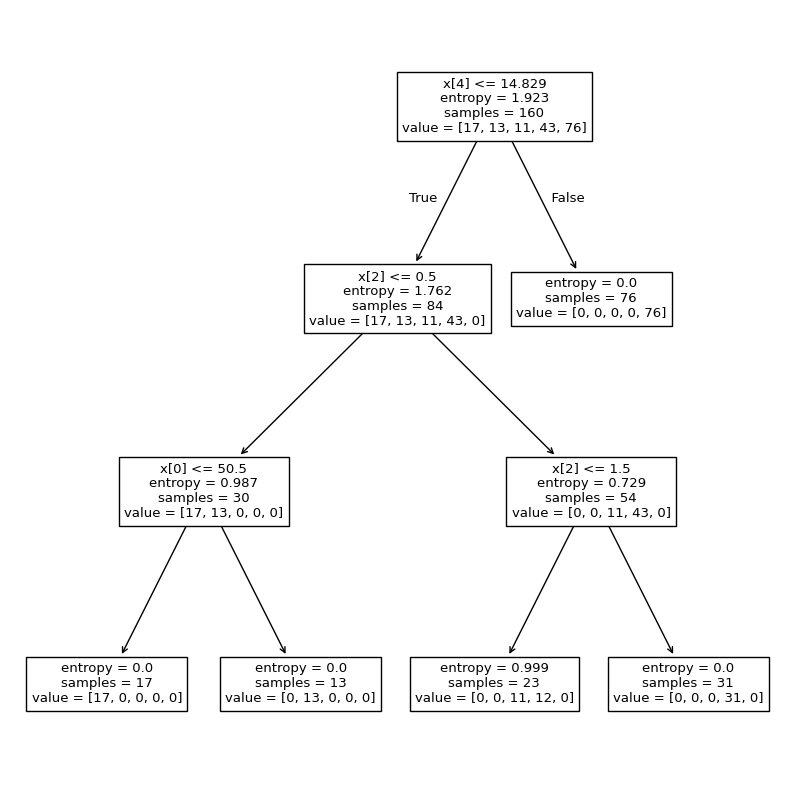

In [31]:
print(accuracy_score(y_pred_entropy, y_test))
plt.figure(figsize= (10,10))
tree.plot_tree(clf_entropy.fit(x_train,y_train))
plt.show()